In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import statsmodels.api as sm
import scipy.stats as scs
import math

In [2]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    """Helpful function to plot timeseries"""
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [3]:
def OSR2(predictions, train, test):
    sse = sum((test - predictions)**2)
    sst = sum((test - np.mean(train))**2)
    r2 = 1 - sse/sst
    
    return r2

In [4]:
df = pd.read_csv("data_CHGG.csv")   # change dataset name

In [5]:
df.head()

,Unnamed: 0,timestamp,open,high,low,close,volume,time,EMA,time.1,RSI,time.2,MFI
0,0,2019-04-15,37.43,38.420,37.37,38.23,1582752,2019-04-15,37.8301,2019-04-15,51.2911,2019-04-15,43.3848
1,1,2019-04-12,37.64,37.850,37.06,37.32,839202,2019-04-12,37.7685,2019-04-12,45.2573,2019-04-12,45.1900
2,2,2019-04-11,37.51,37.815,37.34,37.61,1286855,2019-04-11,37.8375,2019-04-11,46.9794,2019-04-11,41.3492
3,3,2019-04-10,36.91,37.320,36.78,37.28,1575465,2019-04-10,37.8725,2019-04-10,44.7582,2019-04-10,26.9010
4,4,2019-04-09,37.22,37.690,36.88,36.98,1415636,2019-04-09,37.9637,2019-04-09,42.7331,2019-04-09,24.0915


In [6]:
# interested in 1-day close price
close = df.close
close.name = 'close'
close.head()

0    38.23
1    37.32
2    37.61
3    37.28
4    36.98
Name: close, dtype: float64

In [7]:
len(close)

1349

In [8]:
train = close.loc[:len(close) -  int(len(close)*0.15) -1]
test = close.loc[len(close) -  int(len(close)*0.15):]
print(train.tail())
print(test.head())

1142    6.24
1143    6.33
1144    6.15
1145    6.14
1146    6.25
Name: close, dtype: float64
1147    6.09
1148    6.15
1149    6.48
1150    6.58
1151    6.58
Name: close, dtype: float64


Text(0,0.5,'1-day close price of train set')

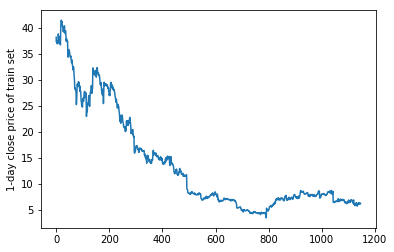

In [9]:
# is 1-day close price  stationary?
train.plot()
plt.ylabel('1-day close price of train set')

Text(0,0.5,'1-day close price of test set')

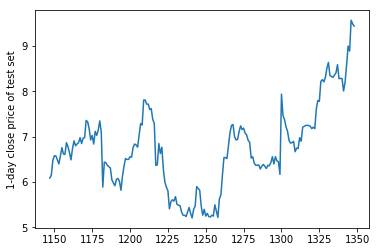

In [10]:
test.plot()
plt.ylabel('1-day close price of test set')

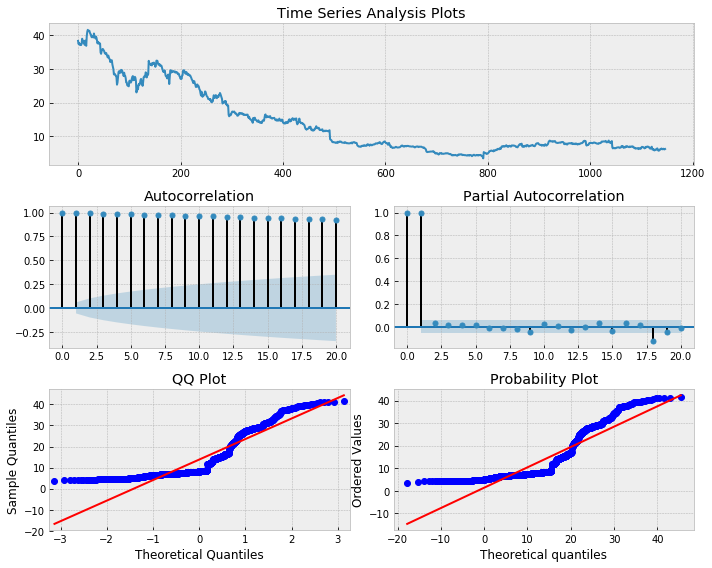

In [11]:
tsplot(train, lags=20)

In [12]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is not small enough to reject the null-hypothesis that the TS is non-stationary

(-2.686424520116674,
 0.0764170242274131,
 2,
 1144,
 {'1%': -3.436079050499444,
  '5%': -2.8640697479399972,
  '10%': -2.5681169015905425},
 1211.8095283750629)

Text(0,0.5,'Difference in 1-day close price')

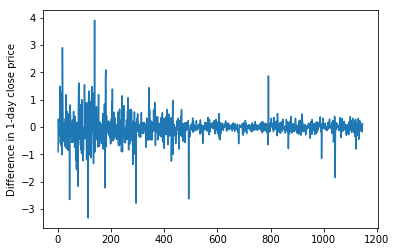

In [13]:
# are the difference between two 1-day close price stationary?
train_diff = train.diff().dropna()
train_diff.name = 'train close diff'
train_diff.plot()
plt.ylabel('Difference in 1-day close price')

In [14]:
# Augmented Dickey-Fuller unit root test
smt.adfuller(train_diff, maxlag=20)
# first value is test statistic. Second value is the p-value
# p-value is small enough to reject the null-hypothesis that the TS is non-stationary

(-26.326433447621007,
 0.0,
 1,
 1144,
 {'1%': -3.436079050499444,
  '5%': -2.8640697479399972,
  '10%': -2.5681169015905425},
 1223.864698603183)

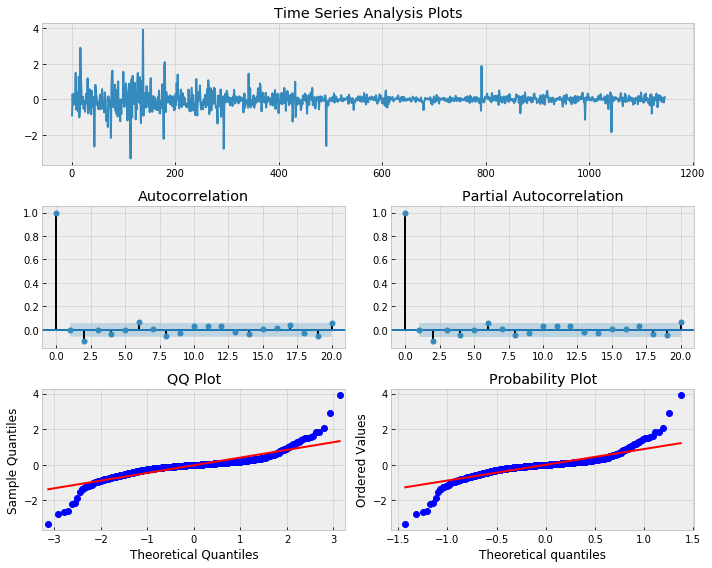

In [15]:
tsplot(train_diff, lags=20)

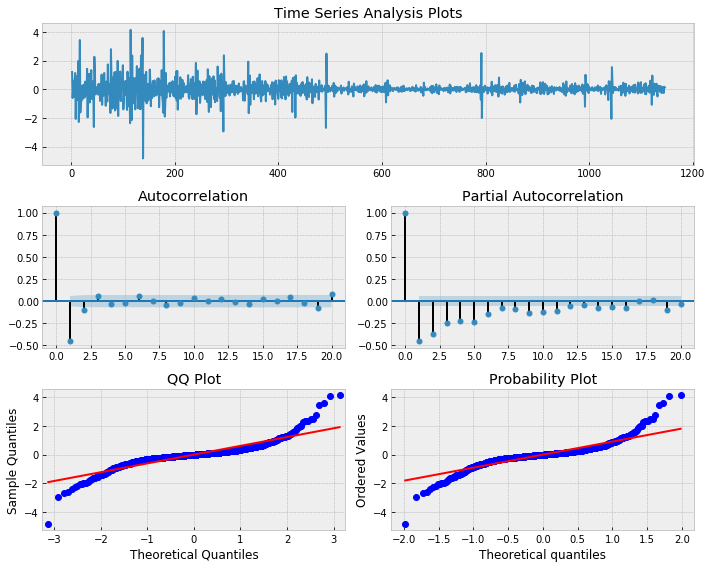

In [24]:
tsplot(train.diff().diff().dropna(), lags=20)

### Fit Model

In [16]:
arima110 = smt.ARIMA(train, (1,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima110_fit = arima110.fit() #change model name*2
arima110_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1146
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -665.744
Method:                       css-mle   S.D. of innovations              0.433
Date:                Wed, 17 Apr 2019   AIC                           1337.487
Time:                        14:52:42   BIC                           1352.619
Sample:                             1   HQIC                          1343.200
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0279      0.013     -2.188      0.029      -0.053      -0.003
ar.L1.D.close    -0.0020      0.030     -0.067      0.947      -0.060       0.056
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1         -507.5600           +0.0000j          507.5600            0.5000
-----------------------------------------------------------------------------
"""

In [17]:
arima011 = smt.ARIMA(train, (0,1,1)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima011_fit = arima011.fit() #change model name*2
arima011_fit.summary() #change model name

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1146
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -665.743
Method:                       css-mle   S.D. of innovations              0.433
Date:                Wed, 17 Apr 2019   AIC                           1337.486
Time:                        14:53:08   BIC                           1352.618
Sample:                             1   HQIC                          1343.199
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0279      0.013     -2.189      0.029      -0.053      -0.003
ma.L1.D.close    -0.0024      0.033     -0.074      0.941      -0.067       0.062
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          409.7143           +0.0000j          409.7143            0.0000
-----------------------------------------------------------------------------
"""

In [21]:
arima010 = smt.ARIMA(train, (0,1,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima010_fit = arima010.fit() #change model name*2
arima010_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                 1146
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -665.746
Method:                           css   S.D. of innovations              0.433
Date:                Wed, 17 Apr 2019   AIC                           1335.492
Time:                        14:54:24   BIC                           1345.580
Sample:                             1   HQIC                          1339.300
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0279      0.013     -2.184      0.029      -0.053      -0.003
==============================================================================
"""

In [25]:
arima022 = smt.ARIMA(train, (0,2,2)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima022_fit = arima022.fit() #change model name*2
arima022_fit.summary() #change model name

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.close   No. Observations:                 1145
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -667.181
Method:                       css-mle   S.D. of innovations              0.432
Date:                Wed, 17 Apr 2019   AIC                           1342.363
Time:                        14:58:22   BIC                           1362.535
Sample:                             2   HQIC                          1349.979
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             7.7e-05   3.84e-05      2.007      0.045    1.81e-06       0.000
ma.L1.D2.close    -1.0055      0.033    -30.307      0.000      -1.071      -0.940
ma.L2.D2.close     0.0055      0.033      0.166      0.868      -0.059       0.070
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2          182.1146           +0.0000j          182.1146            0.0000
-----------------------------------------------------------------------------
"""

In [41]:
arima100 = smt.ARIMA(train, (1,0,0)) #第一个AR， 第二个d，第三个MA  change parameters & model name
arima100_fit = arima100.fit() #change model name*2
arima100_fit.summary() #change model name

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                 1147
Model:                     ARMA(1, 0)   Log Likelihood                -672.162
Method:                       css-mle   S.D. of innovations              0.433
Date:                Wed, 17 Apr 2019   AIC                           1350.324
Time:                        15:33:09   BIC                           1365.459
Sample:                             0   HQIC                          1356.038
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          20.5803     13.388      1.537      0.125      -5.659      46.820
ar.L1.close     0.9996      0.001   1879.191      0.000       0.999       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0004           +0.0000j            1.0004            0.0000
-----------------------------------------------------------------------------
"""

### Analyze residuals

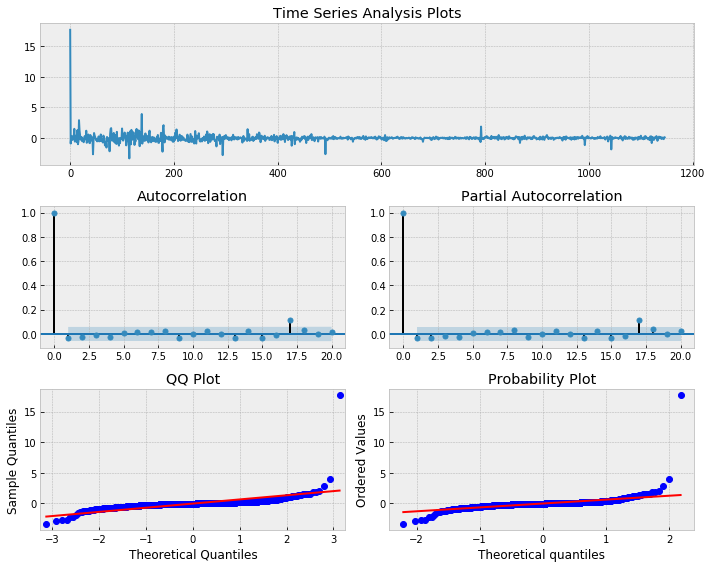

In [43]:
tsplot(arima100_fit.resid, lags=20) #change model name

### Test for remaining autocorrelation

In [42]:
# Ljung box test for remaining autocorrelation
sms.diagnostic.acorr_ljungbox(arima100_fit.resid, lags=(5,)) # or 10 lags       #change model name
#第二个是p-value  p值大于5%,序列为白噪声

(array([2.85637552]), array([0.72211691]))

### Forecasting

In [44]:
num_steps = 5
forecast_mean, forecast_std, forecast_ci = arima100_fit.forecast(steps=num_steps)   #change model name

In [45]:
arima100_fit.forecast(steps=num_steps)   #change model name

(array([6.25612756, 6.26225251, 6.26837483, 6.27449454, 6.28061163]),
 array([0.43344063, 0.61284658, 0.75042027, 0.8663255 , 0.96837439]),
 array([[5.40659954, 7.10565558],
        [5.06109529, 7.46340972],
        [4.79757813, 7.73917153],
        [4.57652775, 7.97246132],
        [4.3826327 , 8.17859055]]))

In [46]:
arima100_fit.forecast(steps=num_steps)[0][4]    #change model name

6.280611626936434

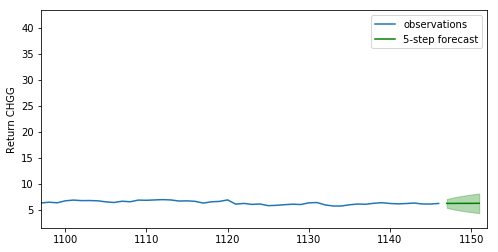

In [47]:
plt.figure(figsize=(8, 4))


plt.plot(train, label='observations')

forecast_steps = range(len(train), len(train) + num_steps)
plt.fill_between(forecast_steps, forecast_ci[:,0], forecast_ci[:,1], color='g', alpha=0.3)
plt.plot(forecast_steps, forecast_mean, label='5-step forecast', color='g')
plt.xlim([len(train) - 50, len(train) + num_steps])
plt.ylabel('Return CHGG')   #change stock name
plt.legend()

### Calculate the performance metrics on test set

In [49]:
pred = []
for i in range(int(len(close)*0.15) ): 
    moving_train = close.loc[:len(close) - int(len(close)*0.15)  -5 + i]
    moving_arima100 = smt.ARIMA(moving_train, (1,0,0))   #change model parameters  & model name
    moving_arima100_fit = moving_arima100.fit()   #change model name*2
    
    pred.append(moving_arima100_fit.forecast(steps=5)[0][4]) #change model name

len(pred)

/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

202

In [50]:
print( "OSR2 = " + str(OSR2(pred, train, test)))
print( "MAE = " + str(np.mean(abs(pred - test))))
print( "RMSE = " + str(math.sqrt(np.mean((pred - test)**2))))
print( "Scaled MAE = " + str(np.mean(abs(pred - test))/(max(test)-min(test))))
print( "Scaled RMSE = " + str(math.sqrt(np.mean((pred - test)**2))/(max(test)-min(test))))

OSR2 = 0.9948231475728816
MAE = 0.38932635565693896
RMSE = 0.5125754465574308
Scaled MAE = 0.08929503570113279
Scaled RMSE = 0.11756317581592449
